0    -0.870677
1    -0.764215
2    -0.935926
3    -1.563113
4    -1.785712
        ...   
58    0.465154
59   -0.465638
60    0.186775
61   -1.009844
62   -0.664993
Length: 63, dtype: float64


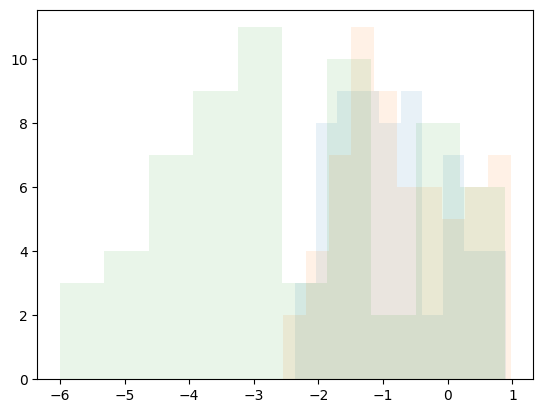

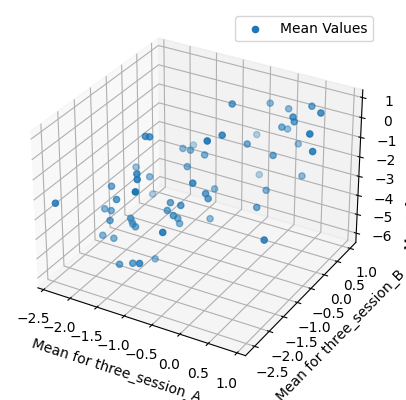

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dataframe=pd.read_csv('raw_test_regression.csv')

def plot_different_stimuli(dataframe):
    # Use regex to filter columns containing 'dino_natural_movie_one'
    #iltered_columns = dataframe.filter(regex='dino')

    # Further filter columns based on 'three_session_A', 'three_session_B', 'three_session_C'
    session_A_df = dataframe.filter(like='natural_movie_one')
    session_B_df=dataframe.filter(like='natural_movie_two')
    session_C_df=dataframe.filter(like='natural_movie_three')

    # Calculate the mean for each row
    row_means_A = session_A_df.mean(axis=1)
    row_means_B=session_B_df.mean(axis=1)
    row_means_C=session_C_df.mean(axis=1)
    print(row_means_A)
    plt.hist(row_means_A,alpha=0.1)
    plt.hist(row_means_B,alpha=0.1)
    plt.hist(row_means_C,alpha=0.1)
    plt.show()

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D scatter plot
    ax.scatter(row_means_A, row_means_B, row_means_C, label='Mean Values')

    # Set labels and legend
    ax.set_xlabel('Mean for three_session_A')
    ax.set_ylabel('Mean for three_session_B')
    ax.set_zlabel('Mean for three_session_C')
    ax.legend()

    # Show the plot
    plt.show()

plot_different_stimuli(dataframe)


In [3]:
import pandas as pd
import plotly.express as px

def plot_3d_mean(dataframe):
    # Use regex to filter columns containing 'dino_natural_movie_one'
    filtered_columns = dataframe.filter(regex='raw')

    neuron_ids=dataframe['cell_ids']

    # Further filter columns based on 'three_session_A', 'three_session_B', 'three_session_C'
    session_A_df = filtered_columns.filter(like='natural_movie_one')
    session_B_df = filtered_columns.filter(like='natural_movie_two')
    session_C_df = filtered_columns.filter(like='natural_movie_three')

    # Calculate the mean for each row
    row_means_A = session_A_df.mean(axis=1)
    row_means_B = session_B_df.mean(axis=1)
    row_means_C = session_C_df.mean(axis=1)

    # Create a DataFrame for the means
    means_df = pd.DataFrame({'Mean_A': row_means_A, 'Mean_B': row_means_B, 'Mean_C': row_means_C, 'cell_ids':neuron_ids, 'inds':dataframe.index })

    # Create a 3D scatter plot with Plotly
    fig = px.scatter_3d(means_df, x='Mean_A', y='Mean_B', z='Mean_C', labels={'Mean_A': 'Mean var exp for movie one', 'Mean_B': 'Mean var exp for movie two', 'Mean_C': 'Mean var exp for movie three'},
                        title='3D Scatter Plot of Mean Variance Explained Across Stimuli',hover_data={'cell_ids': True, 'inds': True})
    
    # Show the plot
    fig.show()


plot_3d_mean(dataframe)
